In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

This is code that preps the data

**below summary statistics and distributions **

In [2]:
happy = pd.read_csv("happy_final.csv")
happy = happy.drop(columns=['Unnamed: 0'])

col_range = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18]
col = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18,27]

happy_clean = happy.iloc[:,col_range]
happy_regions = happy.iloc[:,col]

happy_clean.iloc[:,1:] = happy_clean.iloc[:,1:].apply(pd.to_numeric)
happy_fin = happy_clean.set_index('Country name')
happy_fin = happy_fin.drop(['Democratic Quality','Delivery Quality'],axis=1)
happy_fin.head()

happy_2017 = happy_fin.loc[happy_fin.Year == 2017,]
happy_2018 = happy_fin.loc[happy_fin.Year == 2018,]

stephen = pd.read_csv('happy_2017_final.csv', index_col=0)

stephen.rename(columns={'Country name':'country_name','Life Ladder':'Ladder','Log GDP per capita':'log_gdp_per_cap','Social support':'Social_Support','Healthy life expectancy at birth':'life_exp','Freedom to make life choices':'freedom_make_life_choices','Perceptions of corruption':'perceived_corruption','Positive affect':'pos_aff','Negative affect':'neg_aff','Confidence in national government':'conf_in_gov','gini of household income reported in Gallup, by wp5-year':'gini_household_inc','Democratic Quality':'dem_qual'},inplace=True)


/Users/kirstenlandsiedel/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [21]:
happy_clean.head(30)

,name,Year,Ladder,log_gdp_per_cap,Social_Support,life_exp,freedom_make_life_choices,Generosity,perceived_corruption,pos_aff,neg_aff,conf_in_gov,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,gini_household_inc
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,0.344540
5,Afghanistan,2013,3.572100,7.522238,0.483552,52.560001,0.577955,0.070403,0.823204,0.620585,0.273328,0.482847,-1.879709,-1.403036,1.223690,0.342569,0.304368
6,Afghanistan,2014,3.130896,7.516955,0.525568,52.880001,0.508514,0.113184,0.871242,0.531691,0.374861,0.409048,-1.773257,-1.312503,1.395396,0.445686,0.413974
7,Afghanistan,2015,3.982855,7.500539,0.528597,53.200001,0.388928,0.089091,0.880638,0.553553,0.339276,0.260557,-1.844364,-1.291594,2.160618,0.542480,0.596918
8,Afghanistan,2016,4.220169,7.497038,0.559072,53.000000,0.522566,0.051365,0.793246,0.564953,0.348332,0.324990,-1.855426,-1.392713,1.796219,0.425627,0.418629
9,Afghanistan,2017,2.661718,7.497755,0.490880,52.799999,0.427011,-0.112198,0.954393,0.496349,0.371326,0.261179,-1.886566,-1.437808,1.454051,0.546283,0.286599


__Some basic exploratory plots of different variables against life ladder (happiness).__

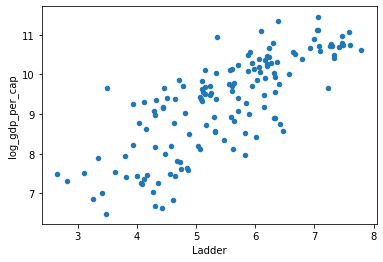

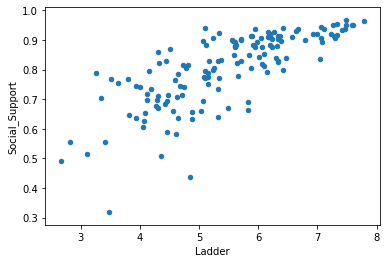

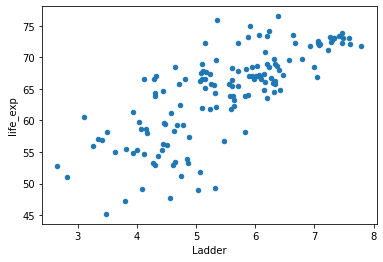

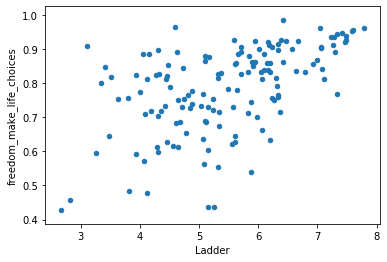

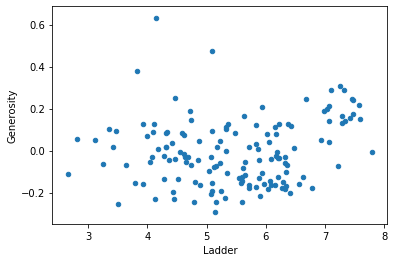

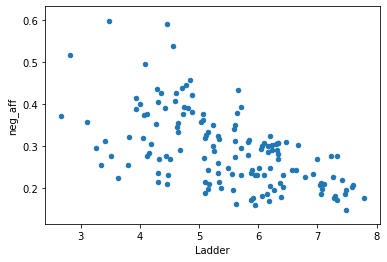

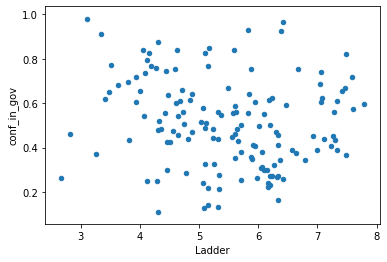

In [3]:
stephen.plot(x='Ladder',y='log_gdp_per_cap',kind='scatter')
stephen.plot(x='Ladder',y='Social_Support',kind='scatter')
stephen.plot(x='Ladder',y='life_exp',kind='scatter')
stephen.plot(x='Ladder',y='freedom_make_life_choices',kind='scatter')
stephen.plot(x='Ladder',y='Generosity',kind='scatter')
stephen.plot(x='Ladder',y='neg_aff',kind='scatter')
stephen.plot(x='Ladder',y='conf_in_gov',kind='scatter')
plt.show()

**above natasha's scatter plots about social support**

**below/at the bottom of natasha's "potential relationships"**

__Now we will show a basic linear regression of the variables onto the life ladder (happiness) score.__

In [4]:
model = smf.ols('Ladder ~ log_gdp_per_cap + Social_Support + life_exp + freedom_make_life_choices + Generosity + perceived_corruption + pos_aff + neg_aff + conf_in_gov +dem_qual', data = stephen).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Ladder   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     47.44
Date:                Thu, 05 Dec 2019   Prob (F-statistic):           4.90e-39
Time:                        10:30:32   Log-Likelihood:                -114.14
No. Observations:                 144   AIC:                             250.3
Df Residuals:                     133   BIC:                             282.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

The most significant indicators of life ladder score, according to the above model's coefficients and p-values, are Social Support, freedom to make life choices, and confidence in national government. 

**above modeling section**

***below potential relationships -- in a new section called "Exploratory analysis of the top and bottom ten countries according to different variables" ***

__Now I will move on to looking at top ten and bottom ten countries for different variables.__

In [5]:
stephen = stephen.set_index('country_name')

First we look at the top ten 'richest' countries according to gdp per capita.

The first graph shoes the countries life ladder scores. 

The second graph shoes the 'richest' countries values for four differeny key variables identified through regression.

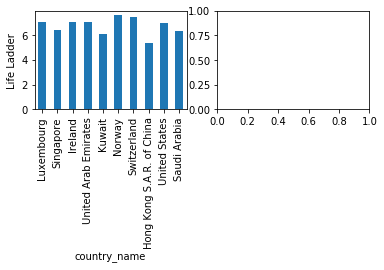

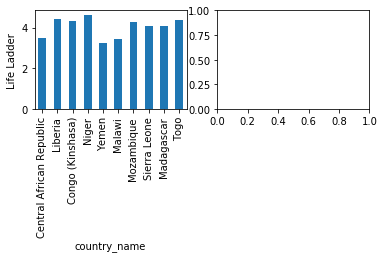

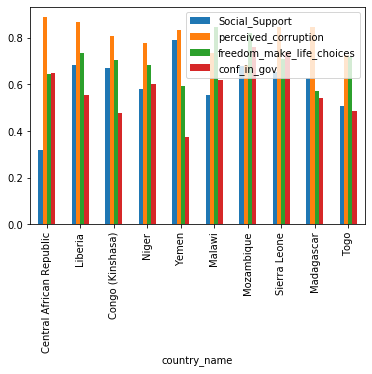

In [6]:
#this needs to be fixed -- does rebecca know how? or returned to its original organziaiton
rich = stephen.sort_values(by=['log_gdp_per_cap'], ascending=False)
richest = rich.head(10)

poor = stephen.sort_values(by=['log_gdp_per_cap'], ascending=True)
poorest = poor.head(10)

plt.subplot(2,2,1)
richest.Ladder.plot.bar()
plt.ylabel('Life Ladder')

plt.subplot(2,2,2)
richest[['Social_Support','perceived_corruption','freedom_make_life_choices','conf_in_gov']].plot.bar()
#plt.legend(loc='upper right', bbox_to_anchor = (1.6,1))

plt.subplot(2,2,3)
poorest.Ladder.plot.bar()
plt.ylabel('Life Ladder')

plt.subplot(2,2,4)
poorest[['Social_Support','perceived_corruption','freedom_make_life_choices','conf_in_gov']].plot.bar()
#plt.legend(loc='upper right', bbox_to_anchor = (1.6,1))

plt.show()

The above side-by-side bar graph shows the top ten 'richest' countries according to gdp per capita. As you can see, all of then have relatively high Social Support and freedom to make life choices. The levels of perceived corruption and confidence in national government, however, are much more variable.

__Simple OLS regression of 'richest' countries__

Next, we did a simple linear regression model (the same as my first model) but with only the top ten countires in terms of their gdp. I expected that once a country reached a place of financial stability that different variables might affect their happiness, since money is no longer a huge concern.

In [7]:
model = smf.ols('Ladder ~ log_gdp_per_cap + Social_Support + life_exp + freedom_make_life_choices + Generosity + perceived_corruption + pos_aff + neg_aff + conf_in_gov + dem_qual', data = richest).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Ladder   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Thu, 05 Dec 2019   Prob (F-statistic):                nan
Time:                        10:30:33   Log-Likelihood:                 274.82
No. Observations:                  10   AIC:                            -529.6
Df Residuals:                       0   BIC:                            -526.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

/Users/kirstenlandsiedel/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
/Users/kirstenlandsiedel/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/kirstenlandsiedel/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/Users/kirstenlandsiedel/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/Users/kirstenlandsiedel/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np

There is soemthing wrong with this?

__Now, we look at the top ten 'poorest' countries according to gdp per capita.__

The first graph shows the countries life ladder scores.

The second graph shows the 'poorest' countries values for four differeny key variables identified through regression.

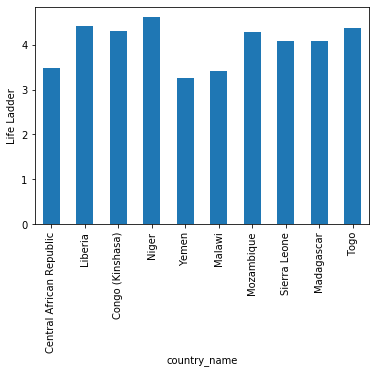

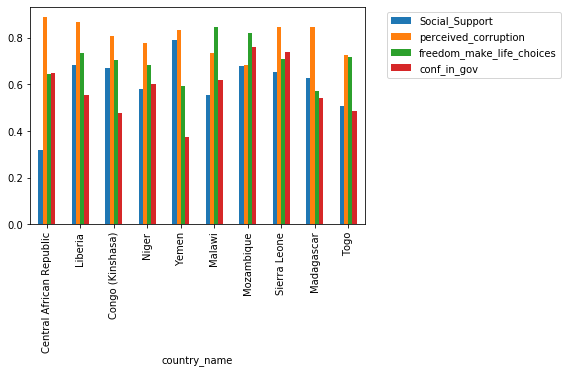

In [8]:
poor = stephen.sort_values(by=['log_gdp_per_cap'], ascending=True)
poorest = poor.head(10)
poorest.Ladder.plot.bar()
plt.ylabel('Life Ladder')
poorest[['Social_Support','perceived_corruption','freedom_make_life_choices','conf_in_gov']].plot.bar()
plt.legend(loc='upper right', bbox_to_anchor = (1.6,1))
plt.show()

These countires have gernally high levels of perceived corruption and lower than average levels of social support and freedom to make life decisions. These countires are also among the saddest in terms of their life ladder scores. This could indicate that a certain level of economic stability/basic income is required in order to be happy (this is a gernal economic theory that has been discussed for year). This is similar to the idea that you must fulfill your basic needs before you can reach your highest happiness potential. 

__Now, we look at the top ten 'happiest' countries according to life ladder scores.__

The first graph shows the countries life ladder scores.

The second graph shows the 'happiest' countries values for four differeny key variables identified through regression.

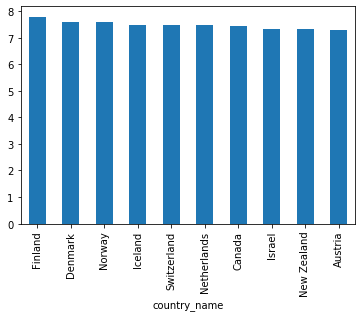

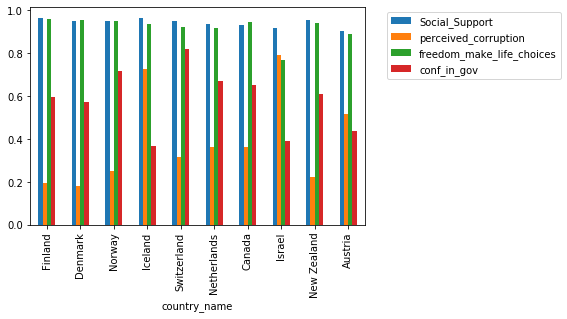

In [9]:
hap = stephen.sort_values(by=['Ladder'], ascending=False)
happiest = hap.head(10)
happiest.Ladder.plot.bar()
happiest[['Social_Support','perceived_corruption','freedom_make_life_choices','conf_in_gov']].plot.bar()
plt.legend(loc='upper right', bbox_to_anchor = (1.6,1))
plt.show()

The happiest countries all have very high social support and freedom to make life choices. This is unsurprising becasue those two variables were highly significant in the regression model. 

The INTERESTING part of the second graph is that these countries have quite variable levels of perceived corruption and confidence in their national government. Confidence in national government was identified as a significant in determining life ladder score. 

This leads to the conclusion that, even if a country has low confidence in their national government and high levels of perceived corruption (like Iceland and Isreal), high levels of social support and freedom to make life choices overpower the negative and produce high levels of happiness. 

__Now, we look at the top ten 'saddest' countries according to life ladder scores.__

The first graph shows the countries life ladder scores.

The second graph shows the 'saddest' countries values for four differeny key variables identified through regression.

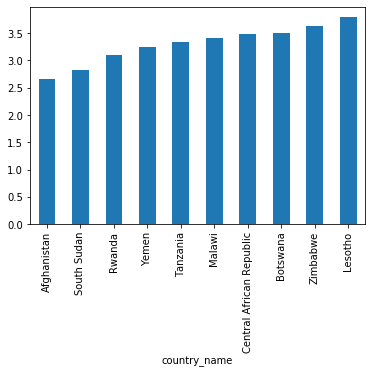

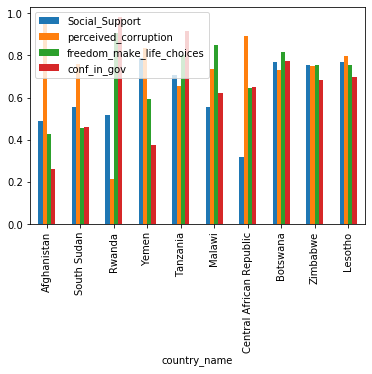

In [10]:
sad = stephen.sort_values(by=['Ladder'], ascending=True)
saddest = sad.head(10)
saddest.Ladder.plot.bar()
saddest[['Social_Support','perceived_corruption','freedom_make_life_choices','conf_in_gov']].plot.bar()
plt.show()

In contrast to the happiest countires, the saddest countries all hace lower than average levels of social support and freedom to make life choices. Since these two variables are SO significant in affecting life ladder, it makes sense that these ten countries are so sad.

**above modeling section**

***below the  "Exploratory analysis of the top and bottom ten countries according to different variablesw" section i mentioned creating before -- make this part a new section called "Analysis of USA, South Korea, and Hong Kong over time" ***

__Next, we focus on three countires (USA, South Korea, and Hong Kong) and study how their variables changes over time (2006-2018).__

We study the change in different variables over time in the three countires we selected. Once these plots were created, we attempted to explain the trends in this data in accordance to political and economic events that match could potentially explain the trends. 

*Note the political/economics events discussed are not proven to be the the cause of any of these treds. The commentary is merely a possible explanation for certain changes in the data in certain years.

In [11]:
#this pulls out the data for the three countires we are focusing on
happy_clean
happy_clean.rename(columns={'Life Ladder':'Ladder','Country name':'name','Log GDP per capita':'log_gdp_per_cap','Social support':'Social_Support','Healthy life expectancy at birth':'life_exp','Freedom to make life choices':'freedom_make_life_choices','Perceptions of corruption':'perceived_corruption','Positive affect':'pos_aff','Negative affect':'neg_aff','Confidence in national government':'conf_in_gov','gini of household income reported in Gallup, by wp5-year':'gini_household_inc'},inplace=True)
happy_clean.head()
threec = happy_clean[(happy_clean.name == 'South Korea') | (happy_clean.name =='United States') | (happy_clean.name == 'Hong Kong S.A.R. of China')]
threec

/Users/kirstenlandsiedel/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,name,Year,Ladder,log_gdp_per_cap,Social_Support,life_exp,freedom_make_life_choices,Generosity,perceived_corruption,pos_aff,neg_aff,conf_in_gov,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,gini_household_inc
615,Hong Kong S.A.R. of China,2006,5.511187,10.680986,0.812178,74.284126,0.909820,0.145260,0.355985,0.723260,0.235955,0.663938,0.849320,1.817265,1.909706,0.346514,NaN
616,Hong Kong S.A.R. of China,2008,5.137262,10.750109,0.840222,74.284126,0.922211,0.285748,0.273945,0.718972,0.236634,0.677437,0.788901,1.800208,1.854945,0.361077,NaN
617,Hong Kong S.A.R. of China,2009,5.397056,10.723057,0.834716,74.644836,0.918026,0.297201,0.272125,0.762151,0.210104,0.619142,0.722850,1.735793,1.969961,0.365007,NaN
618,Hong Kong S.A.R. of China,2010,5.642835,10.781198,0.857314,74.827393,0.890418,0.321339,0.255775,0.710370,0.183106,0.634737,0.725326,1.765605,1.746619,0.309529,0.435544
619,Hong Kong S.A.R. of China,2011,5.474011,10.821496,0.846060,75.227692,0.894330,0.223814,0.244887,0.733887,0.195712,0.584562,0.761782,1.709979,1.936591,0.353779,NaN
620,Hong Kong S.A.R. of China,2012,5.483765,10.827316,0.826426,75.280479,0.879752,0.211643,0.379783,0.715137,0.183349,0.497906,0.822999,1.776015,1.937089,0.353241,NaN
621,Hong Kong S.A.R. of China,2014,5.458051,10.874066,0.833558,75.731361,0.843082,0.212896,0.422960,0.683968,0.242868,0.457823,0.844464,1.842695,1.811950,0.331978,0.550612
622,Hong Kong S.A.R. of China,2016,5.498421,10.904357,0.832078,75.953506,0.799743,0.089243,0.402813,0.664093,0.213115,0.449610,0.563998,1.820220,1.819238,0.330866,0.513229
623,Hong Kong S.A.R. of China,2017,5.362475,10.934087,0.831066,75.907318,0.830657,0.128979,0.415810,0.639533,0.200593,0.545041,0.637072,1.849664,1.784559,0.332787,0.471278
1382,South Korea,2006,5.332178,10.192307,0.775499,70.199997,0.715242,-0.057112,0.798615,0.650549,0.338152,0.226414,0.557025,0.753288,2.223380,0.416974,NaN


__First, we focus on how life ladder/happiness has changed over time.__

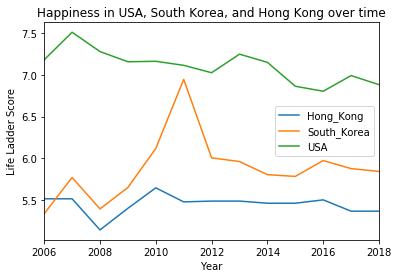

In [12]:
#interesting that happiness didnt dip in the USA during the financial crash of 2008, but it IS dipping now
overtime = threec.pivot_table(columns='name',index='Year',values='Ladder')
overtime.columns = ['Hong_Kong','South_Korea','USA']
overtime.Hong_Kong = overtime.Hong_Kong.ffill()
overtime
#HK had missing data in 2007, 2013, and 2018 so i used forwardfill
overtime.plot()
plt.ylabel('Life Ladder Score')
plt.xlabel('Year')
plt.title('Happiness in USA, South Korea, and Hong Kong over time')
plt.show()

We suspect the large peak in the happiness value for South Korea is due to the economic boom they saw in 2010. Interestingly, although the US faced a huge economic recession in 2008, we do not see a similarly negative dip in happiness during that year. We wanted to study Hong Kong over time in order to view the trends in the data leading up to the current political crisis taking place with the protestors; Hong Kong has maintained a low level of happiness throughout the years.

__Now we look at how social support changes over time.__

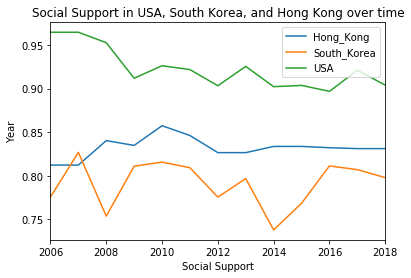

In [13]:
social_support = happy_clean[(happy_clean.name == 'South Korea') | (happy_clean.name =='United States')| (happy_clean.name == 'Hong Kong S.A.R. of China')]
social_support

soc = threec.pivot_table(columns='name',index='Year',values='Social_Support')
soc
soc.columns = ['Hong_Kong','South_Korea','USA']
soc

soc.Hong_Kong = soc.Hong_Kong.ffill()
soc.USA = soc.USA.ffill()
soc
soc.plot()
plt.ylabel('Year')
plt.xlabel('Social Support')
plt.title('Social Support in USA, South Korea, and Hong Kong over time')
plt.show()

#article shows huge economic book in korea in 2011

Social support varies somewhat year to year, but not by much if you look at the range of the y axis. It seems that all three places have pretty decent social support across time, although, the US leads by a small margin. USA shows the highest overall social support, and the other two lag behind a little.

__Now we look at how gdp per capita changes over time.__

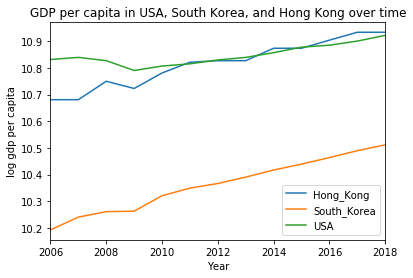

In [14]:
gdp = threec.pivot_table(columns='name',index='Year',values='log_gdp_per_cap')
gdp.columns = ['Hong_Kong','South_Korea','USA']
gdp.Hong_Kong = gdp.Hong_Kong.ffill()
gdp.plot()
plt.ylabel('log gdp per capita')
plt.xlabel('Year')
plt.title('GDP per capita in USA, South Korea, and Hong Kong over time')
plt.show()

All three of the places we are studying had steady growth in GDP over the years. South Korea's GDP is a good deal lower than the other two.

__Now we look at how negative affect changes over time.__

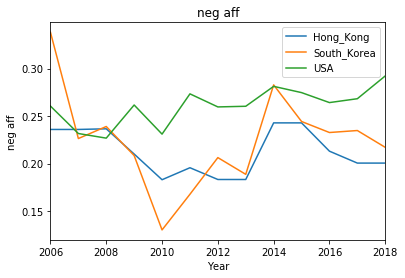

In [15]:
neg = threec.pivot_table(columns='name',index='Year',values='neg_aff')
neg.columns = ['Hong_Kong','South_Korea','USA']
neg.Hong_Kong = neg.Hong_Kong.ffill()
neg.plot()
plt.ylabel('neg aff')
plt.xlabel('Year')
plt.title('neg aff')
plt.show()

USA: There are no huge peaks or valleys for the USA. We do see a general trend towards more negativity though, which could be a generational change.

South Korea: South Korea's economy collapsed in 1997. This financial crisis contiued until 2010 when the economy saw a significant rebound to pre-crisis levels with a 6.1% annual growth rate. This could explain why South Korean's had very negative attitudes (as seen in the graph) until 2010, when things began to turn around fiscally. 
Then, in 2014-2016, Korea experienced a significant political scandal with the declining satisfaction with and eventual impeachment of president Park Guen-hye due to corruption and abuse of power. The Sewol ferry sinkig accident in 2014 was the beginning of the end of Korean satisfaction with the president.

Hong Kong: We see more negative sentiments from around 2013-2016. This could be due to the pro-democracy rallies and referendums taking palce: the people were pushing for more democratic elections, which they were denied. This lack of satisfaction with the government could have lead to the peak in negative sentiment shows in that time period.

__Now we look at how positive affect has changed over time.__

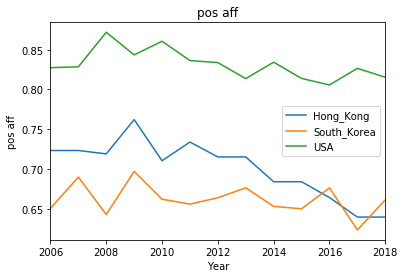

In [16]:
pos = threec.pivot_table(columns='name',index='Year',values='pos_aff')
pos.columns = ['Hong_Kong','South_Korea','USA']
pos.Hong_Kong = pos.Hong_Kong.ffill()
pos
pos.plot()
plt.ylabel('pos aff')
plt.xlabel('Year')
plt.title('pos aff')
plt.show()

USA: We see positive affect steadily decliding.

South Korea: We see variation in positive affect but little overall change.

Hong Kong: We see positive affect steadily decliding since around 2012, probobly due to the protests and political scandals that continue to break out in Hong Kong, even to this day with the current protests. 2012 also happens to be when Leung Chun-ying became executive chief officer of Hong Kong; his administration faced many political controversies, which could have continued to decrease the positive affect in Hong Kong.

Generally, though, we see that the USA is a lot more positive than the other two: this could just be a cultural difference. 

__Now we look at how confidence in national government changes over time.__

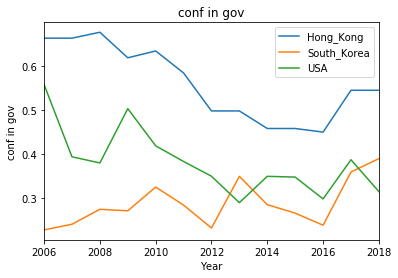

In [17]:
conf = threec.pivot_table(columns='name',index='Year',values='conf_in_gov')
conf.columns = ['Hong_Kong','South_Korea','USA']
conf.Hong_Kong = conf.Hong_Kong.ffill()
conf.plot()
plt.ylabel('conf in gov')
plt.xlabel('Year')
plt.title('conf in gov')
plt.show()

In [22]:
threec.head()

,name,Year,Ladder,log_gdp_per_cap,Social_Support,life_exp,freedom_make_life_choices,Generosity,perceived_corruption,pos_aff,neg_aff,conf_in_gov,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,gini_household_inc
615,Hong Kong S.A.R. of China,2006,5.511187,10.680986,0.812178,74.284126,0.909820,0.145260,0.355985,0.723260,0.235955,0.663938,0.849320,1.817265,1.909706,0.346514,NaN
616,Hong Kong S.A.R. of China,2008,5.137262,10.750109,0.840222,74.284126,0.922211,0.285748,0.273945,0.718972,0.236634,0.677437,0.788901,1.800208,1.854945,0.361077,NaN
617,Hong Kong S.A.R. of China,2009,5.397056,10.723057,0.834716,74.644836,0.918026,0.297201,0.272125,0.762151,0.210104,0.619142,0.722850,1.735793,1.969961,0.365007,NaN
618,Hong Kong S.A.R. of China,2010,5.642835,10.781198,0.857314,74.827393,0.890418,0.321339,0.255775,0.710370,0.183106,0.634737,0.725326,1.765605,1.746619,0.309529,0.435544
619,Hong Kong S.A.R. of China,2011,5.474011,10.821496,0.846060,75.227692,0.894330,0.223814,0.244887,0.733887,0.195712,0.584562,0.761782,1.709979,1.936591,0.353779,NaN


USA: The 2008 financial crisis could explain the dip and then recovery of confidence in the government in the US during those years. Other than that, we see somewhat of a decrease in confidence in the US government over time.

South Korea: The confidence in government in South Korea remains low over time.

Hong Kong: Confidence in government steadily declines in Hong Kong, especially during Donald Tsang and Leung Chun-ying's administrations, which were both riddled with conflict. The number of scandals and lack of democracy in Hong Kong during this time could explain the decline in confidence in national government.

__Now we look at how freedom to make life choices changes over time.__

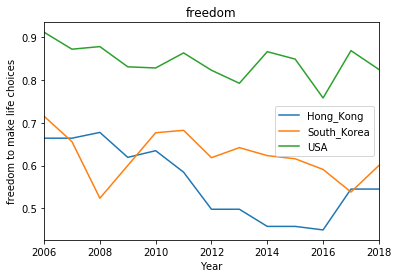

In [18]:
free = threec.pivot_table(columns='name',index='Year',values='freedom_make_life_choices')
free.columns = ['Hong_Kong','South_Korea','USA']
free.Hong_Kong = conf.Hong_Kong.ffill()
free.plot()
plt.ylabel('freedom to make life choices')
plt.xlabel('Year')
plt.title('freedom')
plt.show()

USA: People in the United States seem to feel generally free across the years.

South Korea: There is a dip in perceived freedom in South Korea in 2008. 

Hong Kong: Starting 2008, the poeple of Hong Kong begin to feel less free. This could also be due to the vast corruption in the government during the time frame we are studying.

**above modeling section**